## Unveiling the Challenge: Predicting NBA Match Wins from Past Performance

In the dynamic arena of the National Basketball Association (NBA), where the roar of the crowd and the swish of the net intertwine in a mesmerizing dance, predicting the outcome of a game is akin to capturing lightning in a bottle. The allure of deciphering the intricate web of player dynamics, strategic decisions, and game-changing moments has led us to explore the uncharted territories of data-driven insights. As we step into the world of sports analytics through this Medium article, we set our sights on the tantalizing challenge of predicting NBA match wins based on the historical performance of teams. Brace yourself, for this is a journey through the labyrinth of statistics and machine learning, a journey that reveals that while the pursuit of predictive power is captivating, the reality often echoes a humbling truth: predicting game outcomes from past performances alone remains a formidable puzzle with elusive solutions. Join us as we unpack the intricacies and delve into the heart of an analysis that exposes the complexities of NBA match predictions, reminding us that the essence of sports lies in its unpredictability.

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

from nba_api.stats.endpoints import leaguedashteamstats, leaguedashplayerstats


In [179]:
season = "2021-22"

In [186]:
# collect the NBA team-ids
team_stats = leaguedashteamstats.LeagueDashTeamStats(season=season).get_data_frames()[0]

team_ids = team_stats["TEAM_ID"]
team_stats

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,...,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK
0,1610612737,Atlanta Hawks,82,43,39,0.524,3941.0,3401,7241,0.470,...,20,15,1,22,23,10,7,6,6,14
1,1610612738,Boston Celtics,82,51,31,0.622,3981.0,3341,7167,0.466,...,5,14,13,19,2,11,5,20,12,2
2,1610612751,Brooklyn Nets,82,44,38,0.537,3951.0,3442,7251,0.475,...,13,10,17,24,5,21,22,16,9,15
3,1610612766,Charlotte Hornets,82,43,39,0.524,3976.0,3508,7497,0.468,...,12,1,10,5,11,12,18,18,4,16
4,1610612741,Chicago Bulls,82,46,36,0.561,3946.0,3422,7127,0.480,...,28,19,6,23,25,24,8,28,13,20
5,1610612739,Cleveland Cavaliers,82,44,38,0.537,3946.0,3255,6940,0.469,...,15,11,22,26,24,15,1,11,25,13
6,1610612742,Dallas Mavericks,82,52,30,0.634,3951.0,3222,6982,0.461,...,24,25,3,29,28,1,14,10,24,8
7,1610612743,Denver Nuggets,82,48,34,0.585,3961.0,3416,7079,0.483,...,17,3,26,18,29,17,20,13,10,11
8,1610612765,Detroit Pistons,82,23,59,0.280,3956.0,3129,7267,0.431,...,25,24,20,10,14,26,30,14,28,26
9,1610612744,Golden State Warriors,82,53,29,0.646,3946.0,3323,7087,0.469,...,7,5,29,4,18,2,27,29,15,5


In [6]:
from nba_api.stats.endpoints import playergamelog
from nba_api.stats.endpoints import leaguegamefinder
from nba_api.stats.endpoints import teamgamelog

for each game - 
* get a list of all the player that played in that game
* get the average stat of these players from prev game(s)
* predict which team will win based on the average stat of the players that played 
* add auxeliery data - whos home was it? other parameters?


In [187]:
# Create a LeagueGameFinder instance
game_finder = leaguegamefinder.LeagueGameFinder(season_nullable=season)

# Get the game data
game_data = game_finder.get_data_frames()[0]

# Extract game IDs
game_ids = game_data['GAME_ID'].tolist()
print("Number of games - ", len(game_ids))

Number of games -  4182


# filter out pre-season and playoff games.
the dates are extracted from - https://en.wikipedia.org/wiki/2021%E2%80%9322_NBA_season

In [188]:
regular_season_start_date = pd.to_datetime('2021-10-19')
regular_season_end_date = pd.to_datetime('2022-04-10')

In [189]:
# Convert GAME_DATE column to datetime
game_data['GAME_DATE'] = pd.to_datetime(game_data['GAME_DATE'])

# Filter regular season games
regular_season = (game_data['GAME_DATE'] >= regular_season_start_date) & \
                 (game_data['GAME_DATE'] <= regular_season_end_date)

In [190]:
game_data = game_data[regular_season]

There are 30 NBA teams that each play 82 games during the season. Hence, there should be 82*30 /2 = 1230 games in the dataset 

In [193]:
print("Number of unique games - ", game_data["GAME_ID"].unique().shape[0])

Number of unique games -  1930


In [194]:
# why there are more games than expected. Lets look on the number of teams in the dataset:

In [196]:
print("Number of teams in the NBA -", len(team_ids))
print("Number of teams in the games data frame - ", game_data["TEAM_ID"].unique().shape[0])

Number of teams in the NBA - 30
Number of teams in the games data frame -  68


In [198]:
# filter out any games of teams that are not from the NBA
game_data = game_data[game_data["TEAM_ID"].isin(team_logs.keys())]
print("Number of teams in the games data frame - ", game_data["TEAM_ID"].unique().shape[0])

In [201]:
# we want a dataframe that has one row per game 

In [202]:
def combine_team_games(df, keep_method='home'):
    '''Combine a TEAM_ID-GAME_ID unique table into rows by game. Slow.

        Parameters
        ----------
        df : Input DataFrame.
        keep_method : {'home', 'away', 'winner', 'loser', ``None``}, default 'home'
            - 'home' : Keep rows where TEAM_A is the home team.
            - 'away' : Keep rows where TEAM_A is the away team.
            - 'winner' : Keep rows where TEAM_A is the losing team.
            - 'loser' : Keep rows where TEAM_A is the winning team.
            - ``None`` : Keep all rows. Will result in an output DataFrame the same
                length as the input DataFrame.
                
        Returns
        -------
        result : DataFrame
    '''
    # Join every row to all others with the same game ID.
    joined = pd.merge(df, df, suffixes=['_A', '_B'],
                      on=['SEASON_ID', 'GAME_ID', 'GAME_DATE'])
    # Filter out any row that is joined to itself.
    result = joined[joined.TEAM_ID_A != joined.TEAM_ID_B]
    # Take action based on the keep_method flag.
    if keep_method is None:
        # Return all the rows.
        pass
    elif keep_method.lower() == 'home':
        # Keep rows where TEAM_A is the home team.
        result = result[result.MATCHUP_A.str.contains(' vs. ')]
    elif keep_method.lower() == 'away':
        # Keep rows where TEAM_A is the away team.
        result = result[result.MATCHUP_A.str.contains(' @ ')]
    elif keep_method.lower() == 'winner':
        result = result[result.WL_A == 'W']
    elif keep_method.lower() == 'loser':
        result = result[result.WL_A == 'L']
    else:
        raise ValueError(f'Invalid keep_method: {keep_method}')
    return result

In [204]:
# arrange the games data to have one row per game with the info from both teams combined and sorted by date

In [214]:
game_df = combine_team_games(game_data)

In [215]:
game_df = game_df.sort_values('GAME_DATE').reset_index(drop=True)

In [216]:
game_df

,SEASON_ID,TEAM_ID_A,TEAM_ABBREVIATION_A,TEAM_NAME_A,GAME_ID,GAME_DATE,MATCHUP_A,WL_A,MIN_A,PTS_A,...,FT_PCT_B,OREB_B,DREB_B,REB_B,AST_B,STL_B,BLK_B,TOV_B,PF_B,PLUS_MINUS_B
0,22021,1610612749,MIL,Milwaukee Bucks,0022100001,2021-10-19,MIL vs. BKN,W,239,127,...,0.565,5,39,44,19,3,9,12,17,-23.0
1,22021,1610612747,LAL,Los Angeles Lakers,0022100002,2021-10-19,LAL vs. GSW,L,241,114,...,0.833,9,41,50,30,9,2,17,18,7.0
2,22021,1610612740,NOP,New Orleans Pelicans,0022100009,2021-10-20,NOP vs. PHI,L,240,97,...,0.800,6,41,47,24,9,5,12,11,20.0
3,22021,1610612762,UTA,Utah Jazz,0022100011,2021-10-20,UTA vs. OKC,W,240,107,...,0.611,15,35,50,19,4,2,14,15,-21.0
4,22021,1610612765,DET,Detroit Pistons,0022100004,2021-10-20,DET vs. CHI,L,241,88,...,0.867,9,39,48,18,8,5,17,19,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,22021,1610612753,ORL,Orlando Magic,0022101227,2022-04-10,ORL vs. MIA,W,239,125,...,0.750,10,37,47,20,5,4,10,13,-14.0
1226,22021,1610612756,PHX,Phoenix Suns,0022101229,2022-04-10,PHX vs. SAC,L,240,109,...,0.733,2,38,40,26,9,7,14,18,7.0
1227,22021,1610612763,MEM,Memphis Grizzlies,0022101223,2022-04-10,MEM vs. BOS,L,240,110,...,1.000,14,42,56,34,5,2,15,20,29.0
1228,22021,1610612740,NOP,New Orleans Pelicans,0022101225,2022-04-10,NOP vs. GSW,L,240,107,...,0.846,7,34,41,33,5,2,17,15,21.0


In [219]:
# ensure that there is one row per game
game_df["GAME_ID"].unique().shape

(1230,)

For each game in game_df:
* collect team performance for both teams
* keep label - W/L (format?)

For each game in game_df:
* collect performance of each team in prev games - average of individual measure. 
* add label 
* alternatively - measure the performance of the n-th players of each team.

# collect team performance during the season

Features to train on - 
* FG_PCT: Field Goal Percentage (FGM/FGA)
* FG3_PCT: Three-Point Field Goal Percentage (FG3M/FG3A)
* FT_PCT: Free Throw Percentage (FTM/FTA)
* OREB: Offensive Rebounds
* DREB: Defensive Rebounds
* AST: Assists
* STL: Steals
* BLK: Blocks
* TOV: Turnovers
* PF: Personal Fouls
* PTS: Total Points

In [218]:
columns = ["FG_PCT", "FG3_PCT", "FT_PCT", "OREB", "DREB", "AST", "STL", "BLK", "TOV", "PF", "PTS"]

team_logs = {}
for team_id in team_ids:
    team_game_log = teamgamelog.TeamGameLog(team_id=team_id, season=season)

    # Get the team game log data
    team_game_log_data = team_game_log.get_data_frames()[0]
    team_game_log_data['GAME_DATE'] = pd.to_datetime(team_game_log_data['GAME_DATE'])

    team_game_log_data = team_game_log_data.sort_values(by='GAME_DATE', ascending=True).reset_index()
    team_game_log_data[columns] = team_game_log_data[columns].expanding().mean()
    
    team_logs[team_id] = team_game_log_data

In [60]:
team_logs[team_ids[3]]

,index,Team_ID,Game_ID,GAME_DATE,MATCHUP,WL,W,L,W_PCT,MIN,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,81,1610612766,0022100003,2021-10-20,CHA vs. IND,W,1,0,1.000,240,...,0.667000,12.000000,34.000000,46,29.000000,9.000000,5.000000,8.000000,21.000000,123.000000
1,80,1610612766,0022100017,2021-10-22,CHA @ CLE,W,2,0,1.000,240,...,0.745500,11.500000,34.500000,46,30.500000,11.000000,3.000000,13.000000,18.500000,123.000000
2,79,1610612766,0022100035,2021-10-24,CHA @ BKN,W,3,0,1.000,240,...,0.760000,11.000000,35.666667,48,29.000000,10.666667,3.666667,12.666667,18.000000,119.000000
3,78,1610612766,0022100041,2021-10-25,CHA vs. BOS,L,3,1,0.750,265,...,0.730750,11.750000,36.250000,52,28.250000,9.000000,4.250000,13.000000,19.750000,121.500000
4,77,1610612766,0022100055,2021-10-27,CHA @ ORL,W,4,1,0.800,240,...,0.751200,11.400000,35.000000,40,27.000000,10.000000,4.200000,13.600000,18.600000,121.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,4,1610612766,0022101161,2022-04-02,CHA @ PHI,L,40,38,0.513,240,...,0.739577,10.923077,33.717949,32,27.833333,8.679487,4.820513,12.692308,19.910256,114.833333
78,3,1610612766,0022101181,2022-04-05,CHA @ MIA,L,40,39,0.506,240,...,0.739354,10.873418,33.594937,31,27.911392,8.670886,4.797468,12.696203,19.886076,114.835443
79,2,1610612766,0022101196,2022-04-07,CHA vs. ORL,W,41,39,0.513,240,...,0.739375,10.862500,33.750000,56,27.925000,8.675000,4.862500,12.675000,19.850000,115.000000
80,1,1610612766,0022101208,2022-04-08,CHA @ CHI,W,42,39,0.519,240,...,0.742593,10.827160,33.703704,38,28.000000,8.654321,4.851852,12.654321,19.864198,115.222222


# collect features for each game 

In [220]:
game_featues = []
for index, game in game_df.iterrows():
    team_a = game["TEAM_ID_A"]
    if not team_a in team_logs.keys():
        continue # apperantly there are games in 
    
    team_b = game["TEAM_ID_B"]
    game_id = game["GAME_ID"]
    
    feat_index_a = team_logs[team_a][team_logs[team_a]["Game_ID"] == game_id].index[0] # - 1
    feat_index_b = team_logs[team_b][team_logs[team_b]["Game_ID"] == game_id].index[0] # - 1

    if feat_index_a >= 0 and feat_index_b >= 0:
        # print(game)

        feat_a = team_logs[team_a].loc[feat_index_a][columns]
        feat_b = team_logs[team_b].loc[feat_index_b][columns]
        
        feat_a = feat_a.rename(lambda x: x + '_A')
        feat_b = feat_b.rename(lambda x: x + '_B')

        feat = pd.concat([feat_a, feat_b], axis=0)
        
        # add label - 1 = team-a won
        feat["label"] = int(game["WL_A"] == "W")
        feat["GAME_ID"] = game_id
        feat["GAME_DATE"] = game["GAME_DATE"]
        game_featues.append(feat)
        
df = pd.DataFrame(game_featues).reset_index()

In [165]:
df    

,index,FG_PCT_A,FG3_PCT_A,FT_PCT_A,OREB_A,DREB_A,AST_A,STL_A,BLK_A,TOV_A,...,DREB_B,AST_B,STL_B,BLK_B,TOV_B,PF_B,PTS_B,label,GAME_ID,GAME_DATE
0,0,0.457000,0.378000,0.778000,13.000000,41.000000,25.000000,8.000000,9.000000,7.000000,...,39.000000,19.000000,3.000000,9.000000,12.000000,17.000000,104.000000,1,0022100001,2021-10-19
1,0,0.474000,0.357000,0.474000,5.000000,40.000000,21.000000,7.000000,4.000000,17.000000,...,41.000000,30.000000,9.000000,2.000000,17.000000,18.000000,121.000000,0,0022100002,2021-10-19
2,0,0.440000,0.298000,0.867000,12.000000,41.000000,18.000000,6.000000,5.000000,10.000000,...,35.000000,19.000000,4.000000,2.000000,14.000000,15.000000,86.000000,1,0022100011,2021-10-20
3,0,0.530000,0.424000,1.000000,13.000000,40.000000,28.000000,8.000000,8.000000,10.000000,...,29.000000,38.000000,6.000000,5.000000,10.000000,17.000000,121.000000,1,0022100007,2021-10-20
4,0,0.430000,0.419000,0.667000,12.000000,34.000000,29.000000,9.000000,5.000000,8.000000,...,43.000000,29.000000,2.000000,10.000000,16.000000,24.000000,122.000000,1,0022100003,2021-10-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,81,0.462305,0.351024,0.775159,9.256098,33.768293,23.390244,6.731707,3.963415,11.707317,...,34.329268,27.914634,7.634146,4.914634,12.304878,18.085366,113.158537,1,0022101219,2022-04-10
1226,81,0.485707,0.364378,0.795305,9.768293,35.524390,27.365854,8.560976,4.378049,12.341463,...,33.378049,23.695122,7.170732,4.500000,13.536585,18.926829,110.304878,0,0022101229,2022-04-10
1227,81,0.469939,0.365207,0.742244,10.829268,33.743902,28.073171,8.621951,4.902439,12.707317,...,34.121951,25.024390,6.365854,4.951220,12.646341,18.841463,108.621951,1,0022101217,2022-04-10
1228,81,0.436976,0.356683,0.743195,11.475610,34.646341,21.865854,6.951220,4.865854,12.402439,...,31.975610,22.060976,9.000000,4.585366,11.646341,19.597561,109.390244,1,0022101226,2022-04-10


# split data to train/test sets

In [221]:
N = df.shape[0]

In [222]:
train_df = df.loc[:int(0.8*N)]
test_df = df.loc[int(0.8*N)+1 :]

In [223]:
y_train = train_df["label"]
X_train = train_df.drop(columns=["index", "label", "GAME_ID", "GAME_DATE"])

y_test = test_df["label"]
X_test = test_df.drop(columns=["index", "label", "GAME_ID", "GAME_DATE"])

In [228]:
from sklearn.preprocessing import StandardScaler
# feature scaling 
# Instantiate the StandardScaler
scaler = StandardScaler()

In [229]:
X_train = scaler.fit_transform(X_train)

In [231]:
X_test = scaler.transform(X_test)

## the data set for classification - 
* for each game in game_df
* if its not the 1st game of any team - 
    - team-a collect the perfoemance features from the prev game (from the team_logs df)
    - team-b collect the perfoemance features from the prev game (from the team_logs df)
    - collect the label - 1 = team-a won, 0 team-b won
    - arrange in a new dataframe - [game_id, date(?), label, team-a-features, team-b-features]
* split to train/validation/test - for simplicity - train/test (maybe test will consist of the last 20% games)
* feature scaling (?)
* fit a model
* test and visualize the performance


# Train the model

In [232]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Create the Random Forest model (robust to scaling)
rf_model = RandomForestClassifier(random_state=42)

# Create the XGBoost model (sensitive to scaling)
xgb_model = XGBClassifier(random_state=42)

# Define the scoring metrics dictionary
scoring = {
    "AUC": "roc_auc",
    "Accuracy": make_scorer(accuracy_score),
    "Precision": make_scorer(precision_score),
    "Recall": make_scorer(recall_score),
    "F1_score": make_scorer(f1_score)
}

# Perform cross-validation and compute scores for Random Forest
rf_scores = cross_validate(rf_model, X_train, y_train, cv=5, scoring=scoring, return_estimator=True)
rf_models = rf_scores.pop("estimator")

# Perform cross-validation and compute scores for XGBoost
xgb_scores = cross_validate(xgb_model, X_train, y_train, cv=5, scoring=scoring, return_estimator=True)
xgb_models = xgb_scores.pop("estimator")

# Print the mean scores for each metric
print("Random Forest Scores:")
for metric, scores in rf_scores.items():
    print(f"{metric}: {scores.mean()}")

print("\nXGBoost Scores:")
for metric, scores in xgb_scores.items():
    print(f"{metric}: {scores.mean()}")


Random Forest Scores:
fit_time: 0.16094050407409669
score_time: 0.008722019195556641
test_AUC: 0.6852372034956304
test_Accuracy: 0.6324873096446699
test_Precision: 0.6494037909471313
test_Recall: 0.7166666666666666
test_F1_score: 0.6809942417933131

XGBoost Scores:
fit_time: 0.12779197692871094
score_time: 0.003843402862548828
test_AUC: 0.6878693300041615
test_Accuracy: 0.6365482233502539
test_Precision: 0.6508352451216386
test_Recall: 0.7296296296296296
test_F1_score: 0.6872977227521082


In [233]:
preds = []
for model in xgb_models:
    pred = model.predict(X_test)
    preds.append(pred)

y_pred = np.stack(preds).mean(axis=0)

In [234]:
# compute scores
acc = accuracy_score(y_test, y_pred > 0.5, normalize=False)
auc = roc_auc_score(y_test, y_pred)
prec = precision_score(y_test, y_pred > 0.5)
recall = recall_score(y_test, y_pred > 0.5)
f1 = f1_score(y_test, y_pred > 0.5)

print("Test performance:")
print("Accuracy: ", acc/y_pred.shape[0])
print("AUC: ", auc)
print("Precision: ", prec)
print("Recall: ", recall)
print("F1 score: ", f1)


Test performance:
Accuracy:  0.6326530612244898
AUC:  0.6967722534081796
Precision:  0.6181818181818182
Recall:  0.7906976744186046
F1 score:  0.693877551020408


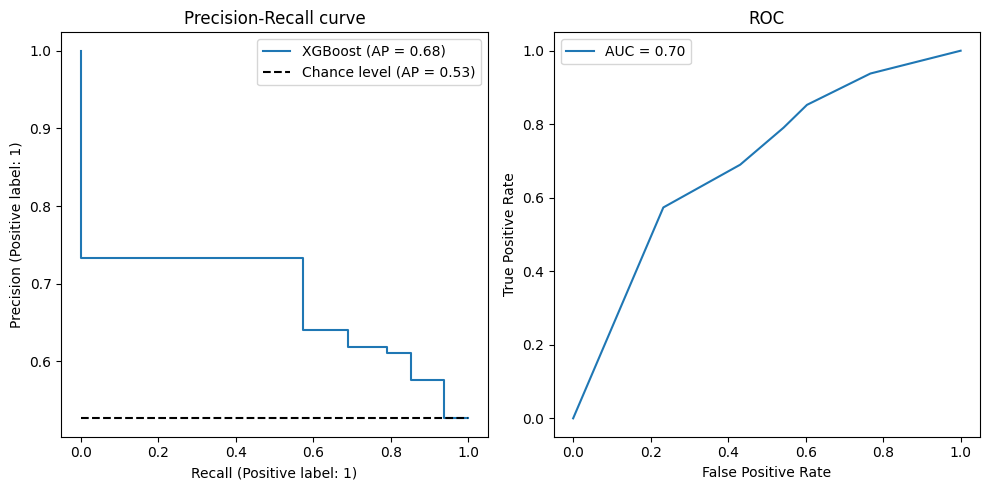

In [235]:
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import RocCurveDisplay, roc_curve, auc

fig, axes = plt.subplots(1,2, figsize=(10, 5))

display = PrecisionRecallDisplay.from_predictions(
    y_test, y_pred, name="XGBoost", plot_chance_level=True, ax=axes[0])
axes[0].legend()

_ = display.ax_.set_title("Precision-Recall curve")


fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot(axes[1])
axes[1].set_title("ROC")
plt.legend()
plt.tight_layout()